In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import dates as dt

In [2]:
files_path = 'D:\\Stations_data\\Bansathi\\Bansathi_all_months_copy'
os.chdir(files_path)

In [3]:
df = pd.read_csv('Bansathi_all.csv', delimiter = ',')
df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y %H:%M:%S')

In [15]:
df_copy = df.loc[:, ['S1counts', 'S2counts', 'S3counts', 'S4counts', 'S5counts', 'S6counts',
          'S7counts', 'S8counts', 'S9counts', 'S10counts']]
df_copy

,S1counts,S2counts,S3counts,S4counts,S5counts,S6counts,S7counts,S8counts,S9counts,S10counts
date,,,,,,,,,,
2020-02-29 07:06:14,13004.0,11770.0,11918.0,12587.0,12972.0,12894.0,13123.0,13447.0,14518.0,12512.0
2020-02-29 07:16:14,13004.0,11771.0,11917.0,12587.0,12972.0,12893.0,13124.0,13448.0,14521.0,12513.0
2020-02-29 07:26:14,13003.0,11771.0,11917.0,12587.0,12972.0,12894.0,13124.0,13448.0,14520.0,12513.0
2020-02-29 07:36:14,13002.0,11771.0,11917.0,12587.0,12972.0,12892.0,13125.0,13448.0,14519.0,12513.0
2020-02-29 07:46:14,13003.0,11771.0,11917.0,12586.0,12971.0,12893.0,13126.0,13449.0,14518.0,12513.0
...,...,...,...,...,...,...,...,...,...,...
2021-01-28 13:10:48,12083.0,11333.0,11240.0,11289.0,12040.0,13187.0,12385.0,12513.0,12211.0,NaN
2021-01-28 13:20:48,12082.0,11333.0,11241.0,11289.0,12040.0,13187.0,12385.0,12514.0,12210.0,NaN
2021-01-28 13:30:48,12082.0,11333.0,11241.0,11290.0,12040.0,13186.0,12385.0,12514.0,12210.0,NaN


In [4]:
df = df.set_index('date')

In [16]:
good_range = []
for i in df_copy:
    col = df[i]
    sensors = col.name
    
    start_mark = (col.notnull() & col.shift().isnull())
    start = col[start_mark].index
    
    end_mark = (col.notnull() & col.shift(-1).isnull())
    end = col[end_mark].index
    
    for s, e in zip(start, end):
        good_range.append((sensors, s, e))
        
good_ranges = pd.DataFrame(good_range, columns = ['sensors', 'start', 'end'])

In [19]:
#fig = plt.figure(figsize = (25, 20))
#ax = fig.add_subplot(111)
#ax = ax.xaxis_date()
#ax = plt.hlines(good_ranges['sensors'], dt.date2num(good_ranges['start']), dt.date2num(good_ranges['end']))
#fig.tight_layout()

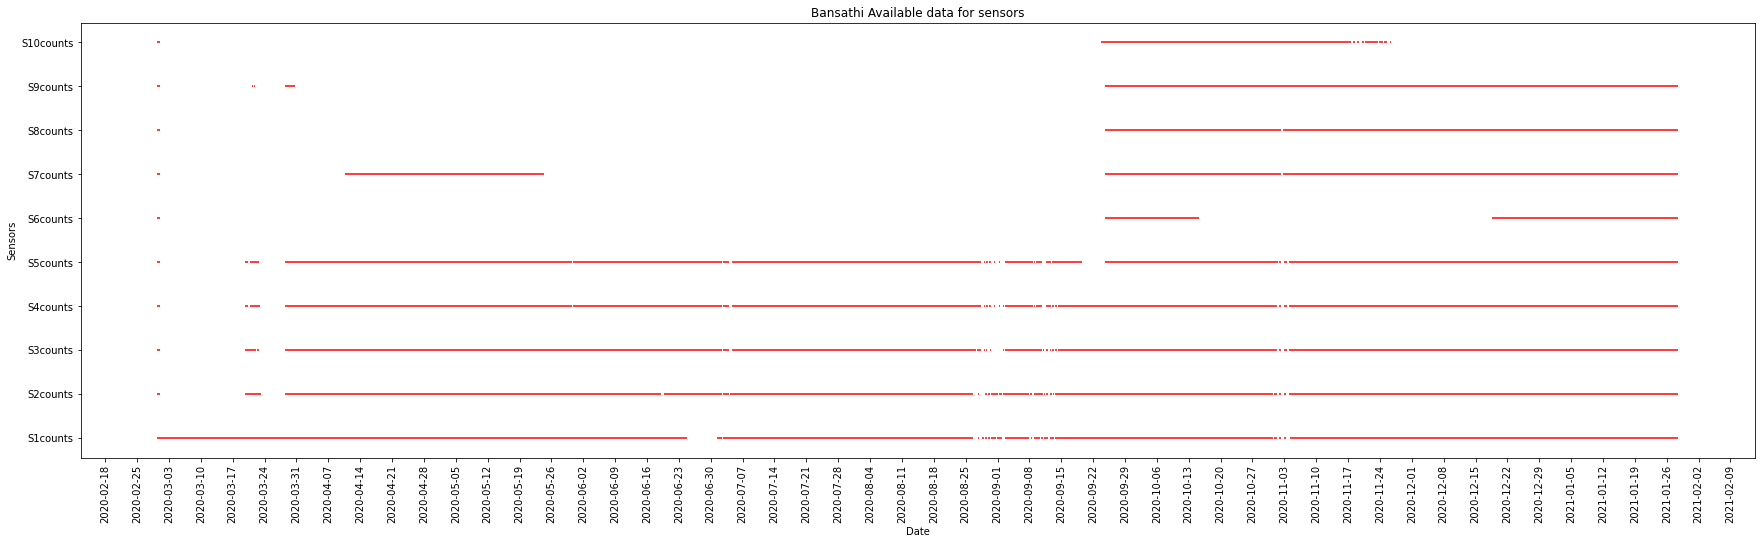

In [18]:
myFmt = dt.DateFormatter('%Y-%m-%d')
fig, ax = plt.subplots(figsize=(30, 8))
ax.set(xlabel = 'Date', ylabel = 'Sensors', title = "Bansathi Available data for sensors")
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation = 90)
#ax.set_xticklabels(xlabels, Rotation = 90)
ax.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
#ax.xaxis.major_formatter(dt.MonthLocator())
ax = plt.hlines(good_ranges['sensors'], dt.date2num(good_ranges['start']), dt.date2num(good_ranges['end']), color = 'red')
plt.savefig('Bansathi_data_availability.png')